In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox

In [573]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

Goal: Find the factors that affect life expentancy. 

In [574]:
df.info()
# Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
# infant deaths: Number of Infant Deaths per 1000 population
# Alcohol: per capita (15+) consumption (in litres of pure alcohol)
# percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
# Hepatitis B: immunization coverage among 1-year-olds (%)
# BMI: Average Body Mass Index of entire population
# under-five deaths Number of under-five deaths per 1000 population
# Polio (Pol3) immunization coverage among 1-year-olds (%)
# Total expenditure: General government expenditure on health as a percentage of total government expenditure
# Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
# HIV/AIDSDeaths per 1 000 live births HIV/AIDS (0-4 years)
# GDP: Gross Domestic Product per capita (in USD)
# Population of the country
# thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
# thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
# Income composition of resources: Human Development Index in terms of income composition of resources
# Schooling: Number of years of Schooling(years)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [575]:
df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Belgium,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [576]:
clean_df = df.copy()
clean_df.interpolate(limit_direction='both', inplace=True)

In [577]:
# Column names were horrible with random spaces so I just reset them with a more consistent naming logic.
columns = ['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality', 'Infant_mortality', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10-19', 'Thinness_5-9', 'Income_composition', 'Schooling' ]
clean_df.columns = columns

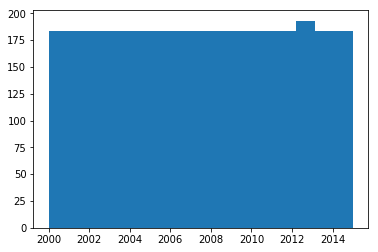

193


In [578]:
# Now I will go through each column to look for outliers or bad data
# Year:
plt.hist(df['Year'], bins=16)
plt.show()
print(len(clean_df[clean_df.Year == 2013]))

#Hmm, there's some extra data in 2013. Why?

In [579]:
clean_df[clean_df.Year == 2013].describe(include='all')

,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_mortality,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19,Thinness_5-9,Income_composition,Schooling
count,193,193.0,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,193.000000,193.000000,193.000000,193.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Belgium,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.0,NaN,70.978756,148.805699,23.968912,3.927021,836.623984,82.299868,1455.150259,...,84.642487,6.377133,86.207254,0.744560,7884.145651,1.197893e+07,4.537550,4.505959,0.681612,12.655401
std,NaN,0.0,NaN,8.294221,106.443340,88.015086,4.161217,2389.338858,24.572639,7776.893575,...,23.293232,2.842071,19.908084,1.572711,15049.020998,2.733745e+07,4.261798,4.223860,0.157076,3.130763
min,NaN,2013.0,NaN,49.900000,5.000000,0.000000,0.010000,0.000000,6.000000,0.000000,...,3.000000,1.120000,3.000000,0.100000,14.214412,2.920000e+02,0.100000,0.100000,0.244000,0.000000
25%,NaN,2013.0,NaN,65.400000,67.000000,0.000000,0.010000,10.666707,79.000000,0.000000,...,82.000000,4.510000,83.000000,0.100000,678.901064,3.237640e+05,1.400000,1.400000,0.559000,10.800000
50%,NaN,2013.0,NaN,72.800000,135.000000,2.000000,2.410000,97.522115,93.000000,6.000000,...,94.000000,5.960000,94.000000,0.100000,2393.188800,1.522692e+06,3.300000,3.300000,0.719000,12.900000
75%,NaN,2013.0,NaN,76.200000,226.000000,17.000000,7.460000,594.645310,97.000000,195.000000,...,98.000000,7.900000,98.000000,0.400000,7674.865590,9.848132e+06,6.800000,6.600000,0.796000,14.700000


In [580]:
extra_years = []
for i in df.Country[df.Year == 2013].unique():
    if i in df.Country[df.Year == 2012].unique():
        None
    else:
        extra_years.append(i)
print(extra_years)
# OK there are 10 countries that only have data in 2013. I'm going to drop these rows. They also didn't have
# records for life expectancy which is our target variable.

to_drop = []
for i in range(len(df.Country)):
    if df.Country[i] in extra_years:
        to_drop.append(i)

clean_df = clean_df.drop(to_drop)
clean_df = clean_df.reset_index()

['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu']


In [581]:
# Status looks good

In [582]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 23 columns):
index                     2928 non-null int64
Country                   2928 non-null object
Year                      2928 non-null int64
Status                    2928 non-null object
Life_expectancy           2928 non-null float64
Adult_mortality           2928 non-null float64
Infant_mortality          2928 non-null int64
Alcohol                   2928 non-null float64
Percentage_expenditure    2928 non-null float64
Hepatitis_B               2928 non-null float64
Measles                   2928 non-null int64
BMI                       2928 non-null float64
Under-five_deaths         2928 non-null int64
Polio                     2928 non-null float64
Total_expenditure         2928 non-null float64
Diphtheria                2928 non-null float64
HIV/AIDS                  2928 non-null float64
GDP                       2928 non-null float64
Population                2928 non-null f

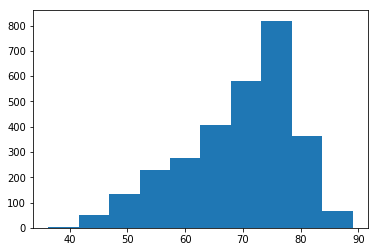

NormaltestResult(statistic=177.35500491008625, pvalue=3.075034656878767e-39)


In [583]:
plt.hist(clean_df['Life_expectancy'])
plt.show()
# Data doesn't appear normal, but let's test:
print(stats.normaltest(clean_df.Life_expectancy))

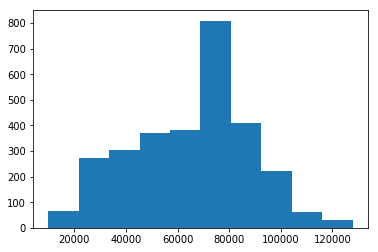

NormaltestResult(statistic=77.70452422751855, pvalue=1.338680553287838e-17)


In [584]:
# Since this is our target variable, and we might want to do machine learning that assumes this is from a
# normal distribution, let's do a boxcox transformation
from scipy.stats import boxcox
boxcox_expectancy,_ = boxcox(clean_df.Life_expectancy)
plt.hist(boxcox_expectancy)
plt.show()
print(stats.normaltest(boxcox_expectancy))

NormaltestResult(statistic=40.26928327044476, pvalue=1.801508197776867e-09)


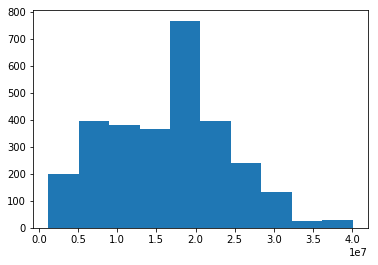

In [585]:
# I can do slightly better by combining an exponential transformation with a boxcox. I can't get it normal though
# and would explore more ways to do this.
exponential = []
for i in clean_df.Life_expectancy:
    exponential.append(i ** 3.9)
#exponential = winsorize(exponential, (0, 0.0))
#exponential,_ = boxcox(exponential)
plt.hist(exponential)
print(stats.normaltest(exponential))
clean_df['Life_expectancy_polynomial'] = exponential

In [586]:
# stats.normaltest(winsorize(clean_df.Life_expectancy, (.02, 0)))

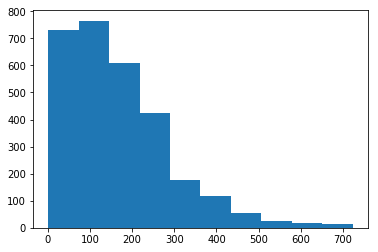

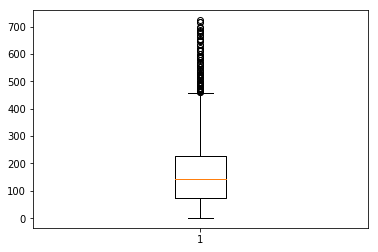

Number of outliers: 0


In [587]:
# Adult_mortality
# The boxplot suggests outliers but the hist looks smooth and with a threshold of 5 for Tukey's method we're all good.
plt.hist(clean_df.Adult_mortality)
plt.show()
plt.boxplot(clean_df.Adult_mortality)
plt.show()
q75, q25 = np.percentile(clean_df.Adult_mortality, [75, 25])
iqr = q75 - q25

min_val = q25 - iqr*5
max_val = q75 + iqr*5
print('Number of outliers: {}'.format(len(np.where((clean_df.Adult_mortality > max_val) | (clean_df.Adult_mortality < min_val))[0])))

In [588]:
# Infant mortality
clean_df[clean_df['Country'] == 'India']
# Noticed that infant deaths has some entries above 1000, which doesn't make sense. After playing around I
# I noticed that it's all from India. Some googling indicates other issues with data that are more complex,
# so I decided to just focus on fixing India. The data is steadily declining, and a quick Google search shows
# the 2015 mortality rate at around 40, so i'll just multiply by a constant to fix it. I'm assuming that
# the data on India is just working off of some different scale than deaths per 1000.

,index,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_mortality,Alcohol,Percentage_expenditure,Hepatitis_B,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19,Thinness_5-9,Income_composition,Schooling,Life_expectancy_polynomial
1185,1187,India,2015,Developing,68.3,181.0,910,4.62,0.000000,87.0,...,6.985,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6,1.426398e+07
1186,1188,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,...,4.690,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6,1.402119e+07
1187,1189,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,...,4.530,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5,1.370226e+07
1188,1190,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,...,4.390,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3,1.346662e+07
1189,1191,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,...,4.330,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8,1.308062e+07
1190,1192,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,...,4.280,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4,1.277778e+07
1191,1193,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,...,4.380,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5,1.248019e+07
1192,1194,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,...,4.340,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2,1.211549e+07
1193,1195,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,...,4.230,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9,1.190051e+07
1194,1196,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,...,4.250,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7,1.161830e+07


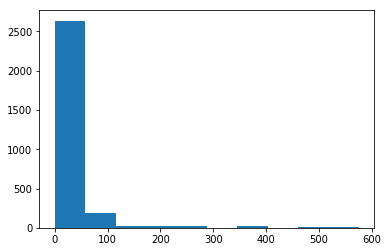

In [589]:
india_fixer = 40 / 910
india_fixer_list = []
for i in range(len(clean_df)):
    if clean_df.Country[i] == 'India':
        india_fixer_list.append(clean_df['Infant_mortality'][i] * india_fixer)
    else:
        india_fixer_list.append(clean_df['Infant_mortality'][i])
clean_df['Infant_mortality'] = india_fixer_list
plt.hist(clean_df.Infant_mortality)
plt.show()
# There's still a lot of outliers after fixing India. Let's do a transformation

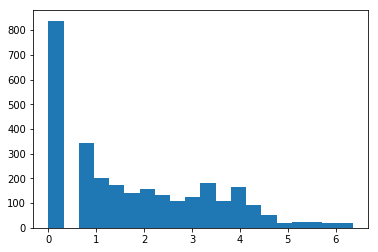

In [590]:
# A bit better
log_infant_mortality = []
for i in clean_df.Infant_mortality:
    log_infant_mortality.append(np.log(i + 1))
clean_df['Infant_mortality'] = log_infant_mortality
plt.hist(log_infant_mortality, bins = 20)
plt.show()

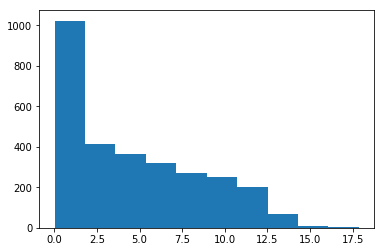

In [591]:
plt.hist(clean_df.Alcohol)
plt.show()

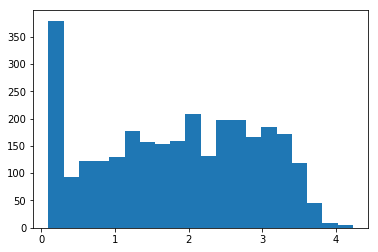

In [592]:
log_alcohol = []
for i in clean_df.Alcohol:
    log_alcohol.append(i ** .5)
plt.hist(log_alcohol, bins=20)
plt.show()
clean_df['Sqrt_Alcohol'] = log_alcohol
# square root looks nicer than log for this one.

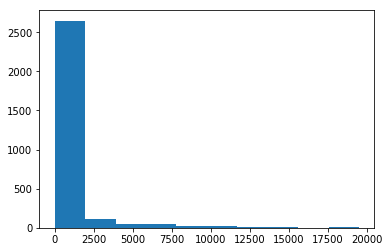

In [593]:
plt.hist(clean_df.Percentage_expenditure)
plt.show()

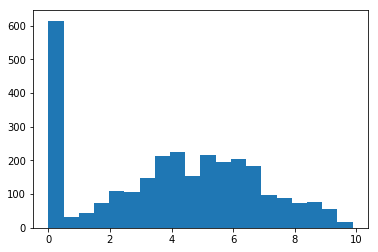

In [594]:
log_expenditure = []
for i in clean_df.Percentage_expenditure:
    log_expenditure.append(np.log(i + 1))
plt.hist(log_expenditure, bins=20)
plt.show()
# This looks decent but it's helping to highlight an issue of groups within the data. Oh wait, this is
# supposed to be a percentage but it looks like most of the data was not set up this way. JK gonna drop this.
clean_df = clean_df.drop(['Percentage_expenditure'], axis=1)

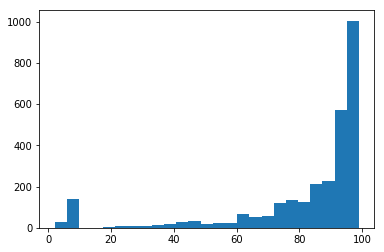

In [595]:
plt.hist(clean_df.Diphtheria, bins=25)
plt.show()
# Since there's a weird bump at the bottom, I would almost consider splitting this into 2 groups.

In [596]:
clean_df.Diphtheria = winsorize(clean_df.Diphtheria, (0.1, 0))

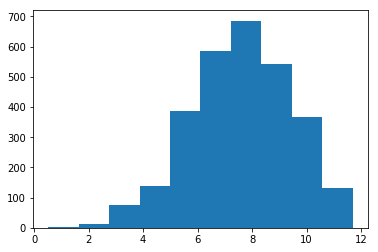

NormaltestResult(statistic=41.07185489604977, pvalue=1.2060353250008781e-09)


In [597]:
plt.hist(np.log(clean_df.GDP))
plt.show()
# Wow that looks really nice! Finally! This tells me that methods involving log, sqrts, boxcox, and winsorizing
# are not actually the right methods. This isn't actually normal, but it's closeish!
clean_df['GDP_log'] = np.log(clean_df.GDP)
print(stats.normaltest(np.log(clean_df.GDP)))

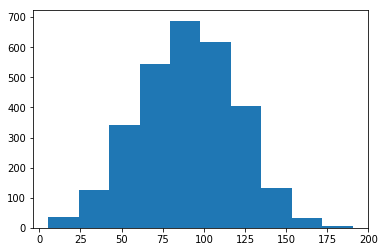

NormaltestResult(statistic=14.374785850292557, pvalue=0.0007560576522168318)


In [598]:
plt.hist(boxcox(np.log(clean_df.Population))[0])
plt.show()
clean_df['Population_boxcox_log'] = boxcox(np.log(clean_df.Population))[0]
print(stats.normaltest(boxcox(np.log(clean_df.Population))[0]))

In [599]:
print(stats.normaltest(boxcox(np.log(clean_df.Population))[0]))

NormaltestResult(statistic=14.374785850292557, pvalue=0.0007560576522168318)


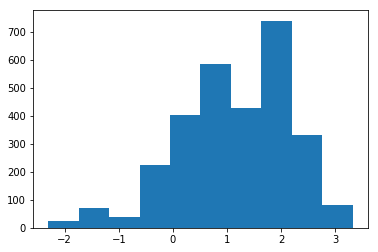

In [600]:
plt.hist(np.log(clean_df['Thinness_10-19']))
plt.show()
clean_df['Thinness_10-19_log'] = np.log(clean_df['Thinness_10-19'])

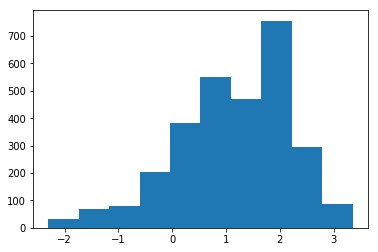

In [601]:
plt.hist(np.log(clean_df['Thinness_5-9']))
plt.show()
clean_df['Thinness_5-9_log'] = np.log(clean_df['Thinness_5-9'])

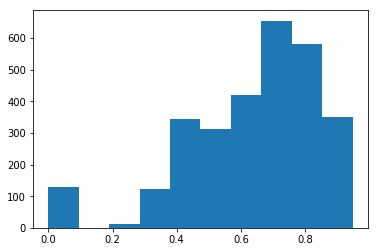

In [602]:
plt.hist(clean_df['Income_composition'])
plt.show()
# I don't really understand this variable. Human development index is a model that already factors in life
# expectancy and since I would need to do more research to understand it I will just exlude it for now.

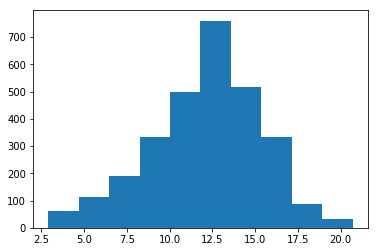

In [603]:
plt.hist(winsorize(clean_df.Schooling, (.01, 0)))
plt.show()
clean_df['Schooling'] = winsorize(clean_df.Schooling, (.01, 0))

In [604]:
clean_df.columns

Index(['index', 'Country', 'Year', 'Status', 'Life_expectancy',
       'Adult_mortality', 'Infant_mortality', 'Alcohol', 'Hepatitis_B',
       'Measles', 'BMI', 'Under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10-19',
       'Thinness_5-9', 'Income_composition', 'Schooling',
       'Life_expectancy_polynomial', 'Sqrt_Alcohol', 'GDP_log',
       'Population_boxcox_log', 'Thinness_10-19_log', 'Thinness_5-9_log'],
      dtype='object')

In [605]:
vars = ['Schooling', 'Life_expectancy_polynomial', 'GDP_log', 'Population_boxcox_log', 'Status']

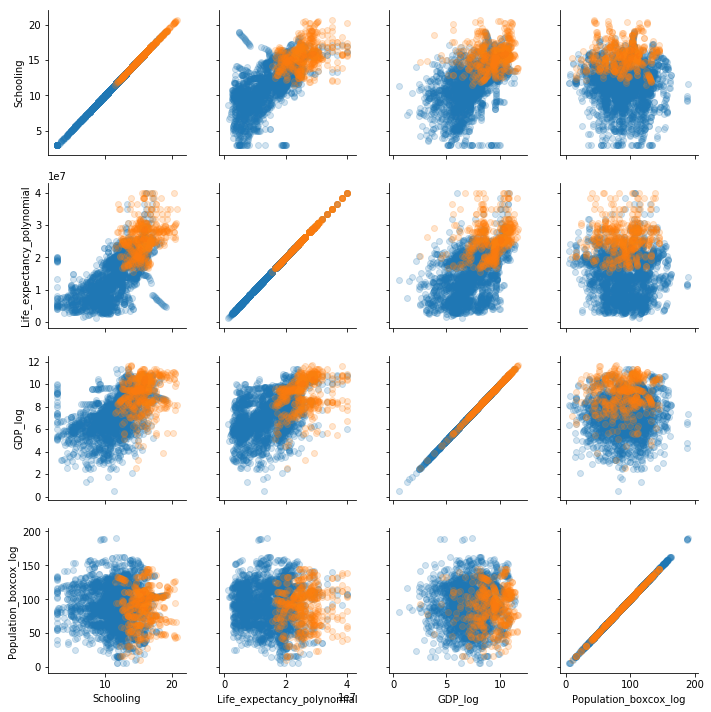

In [606]:
g = sns.PairGrid(clean_df[vars], hue='Status')
g = g.map(plt.scatter, alpha = .2)
# OOOh years of schooling already looking good!

In [607]:
clean_df['Is_Developed'] = list(pd.get_dummies(clean_df.Status).iloc[:, 0])

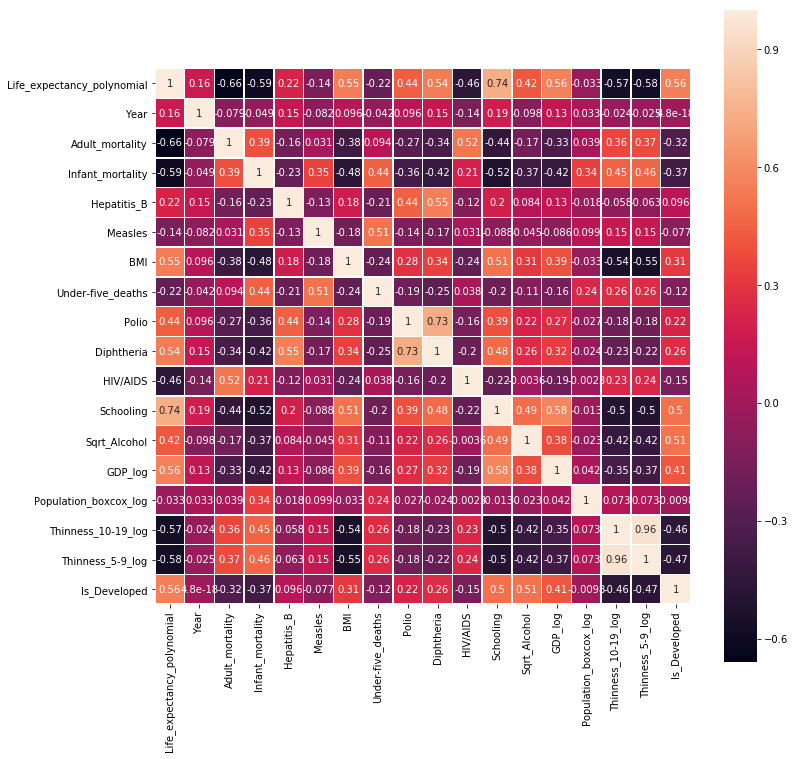

In [608]:
cleaned_vars = ['Life_expectancy_polynomial', 'Country', 'Year', 'Status',
       'Adult_mortality', 'Infant_mortality',
       'Hepatitis_B', 'Measles', 'BMI',
       'Under-five_deaths', 'Polio', 'Diphtheria',
       'HIV/AIDS',
       'Schooling',
       'Sqrt_Alcohol', 'GDP_log', 'Population_boxcox_log',
       'Thinness_10-19_log', 'Thinness_5-9_log', 'Is_Developed']
plt.figure(figsize=(12,12))
sns.heatmap(clean_df[cleaned_vars].corr(), square=True, linewidths=.5, annot=True)
plt.show()

In [609]:
# Both Thinnesses are very highly correlated, so I'm just going to keep Thinness 5-9 since it correlates slightly
# higher with our target and we don't want to keep both.
cleaned_vars = ['Life_expectancy_polynomial', 'Country', 'Year', 'Status', 'Adult_mortality', 
                'Infant_mortality','Hepatitis_B', 'Measles', 'BMI', 'Under-five_deaths', 'Polio', 'Diphtheria', 
                'HIV/AIDS', 'Schooling','Sqrt_Alcohol', 'GDP_log', 'Population_boxcox_log' 'Thinness_5-9_log', 
                'Is_Developed']

In [622]:
# Year, measles, population, under-five deaths, hepatitis-B are all not very highly correlated
# So I'm going to drop them to lower dimensionality. I suspect that further cleaning would increase the
# correlation for some of these though.
cleaned_vars = ['Life_expectancy_polynomial', 'Adult_mortality', 
                'Infant_mortality','Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 
                'HIV/AIDS', 'Schooling','Sqrt_Alcohol', 'GDP_log', 'Thinness_5-9_log', 
                'Is_Developed']

In [616]:
stats.normaltest(clean_df.Life_expectancy_polynomial)

NormaltestResult(statistic=40.26928327044476, pvalue=1.801508197776867e-09)

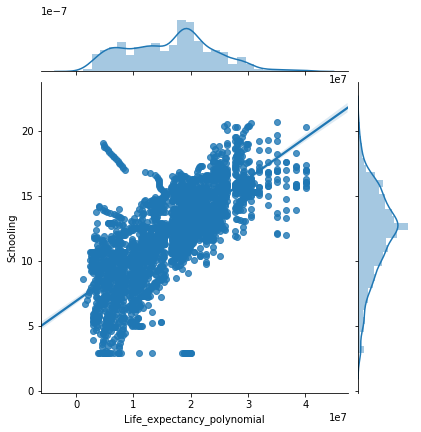

In [620]:
g =sns.jointplot(data=clean_df, x='Life_expectancy_polynomial', y='Schooling', kind='reg')

In [624]:
cleaner_df = clean_df[cleaned_vars]
X = StandardScaler().fit_transform(cleaner_df)
Xt = X.T
Cx = np.cov(Xt)

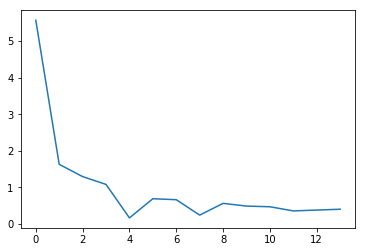

[5.56930986 1.63084965 1.29554355 1.0815536  0.16588818 0.69046642
 0.66365528 0.2424242  0.56353521 0.48950566 0.47067061 0.35745176
 0.38076197 0.40316711]


In [625]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)
# 4 components looks good

In [656]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)
print(sklearn_pca.explained_variance_ratio_)
P = eig_vec_cov[:, 0]
Y = P.T.dot(Xt)


[0.39767198 0.11644948 0.09250722 0.07722744]


In [655]:
Y

array([3.70977244, 3.42783862, 3.35279546, ..., 3.22474242, 4.44192857,
       4.85422768])

In [650]:
pca1 = Y_sklearn.T[0]
pca2 = Y_sklearn.T[1]
pca3 = Y_sklearn.T[2]
pca4 = Y_sklearn.T[3]

In [651]:
clean_df['Pca_1'] = pca1
clean_df['Pca_2'] = pca2
clean_df['Pca_3'] = pca3
clean_df['Pca_4'] = pca4

In [652]:
cleaned_vars = ['Life_expectancy_polynomial', 'Adult_mortality', 
                'Infant_mortality','Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 
                'HIV/AIDS', 'Schooling','Sqrt_Alcohol', 'GDP_log', 'Thinness_5-9_log', 
                'Is_Developed', 'Pca_1', 'Pca_2', 'Pca_3', 'Pca_4']

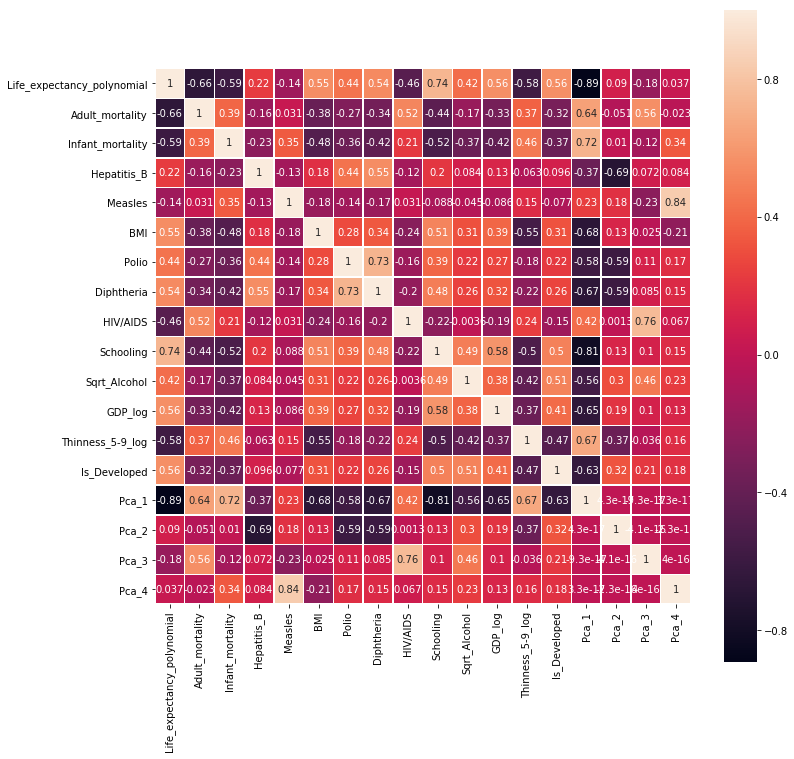

In [653]:
plt.figure(figsize=(12,12))
sns.heatmap(clean_df[cleaned_vars].corr(), square=True, linewidths=.5, annot=True)
plt.show()

In [657]:
# Not sure about this PCA thing....

Findings:
I have created a bunch of features, and could probably have done a much better job and delved much deeper into each variable individually. The data itself has some nonsense in it and is utilizing year data to get past the lack of a large enough sample size (I suspect) in the number of countries. I would like to learn how to leverage year better since it didn't end up in my final features despite being extremely important.